<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3.1ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

load korpus

In [3]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
korpus2='/content/drive/MyDrive/korpusklasifikasi2(preputama).csv'
df = pd.read_csv(korpus2)

In [ ]:
# df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'disgust'].sample(frac=1).index)

In [5]:
temp=[]
for senten in df.content:
  temp.append(ast.literal_eval(senten))
df.content=temp

pilih model

In [6]:
pakai_model=1

load model

In [7]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 8.7 MB/s 


In [9]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpusklasifikasi2-korpusblogspertiga(iter=10)(preptambah).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/dataisear(preputama).glove')

cek model

In [10]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1050252, 100)


In [11]:
if pakai_model == 1:
  print(model.wv["moment"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['moment']])

[ 0.1829412  -0.20841646 -0.11841379  0.06176512  0.01843286 -0.7476842
 -0.1357768   0.3570584   0.18467973  0.16314124  0.2689292  -0.47091943
  0.33631173  0.26520896  0.11842588 -0.15842985 -0.22777186 -0.07783151
 -0.10990053  0.5176937   0.31532422 -0.19624393 -0.61611104 -0.42727137
  0.19681047  0.15604298 -0.1645814  -0.40701595 -0.16730142 -0.16952306
  0.0133235  -0.07503093 -0.40253013  0.07726142  0.27738926  0.06713627
 -0.38675132 -0.3568831   0.76168394 -0.25269416  0.14883569 -0.23769385
 -0.6898097   0.10890555 -0.22432788  0.1385622   0.30645022  0.47575903
 -0.6767433   0.13522422 -0.09588455 -0.40097758 -0.08793411  0.48063126
  0.10320238 -0.42691207 -0.22164477 -0.03949981  0.5404436  -0.46945146
  0.32360876 -0.11010793 -0.01495369 -0.06109467 -0.557356   -0.04228628
 -0.3911382   0.7630794   0.24903841  0.4150474  -0.0036241  -0.15069517
  0.02419975 -0.5002108   0.1296005  -0.13342938  0.05289614  0.43966338
 -0.25862262  0.05307459  0.15369318 -0.32402948 -0.

ambil conntoh model wor embedding

In [ ]:
import array
count=0
simpanang=[]
simpankat=[]
jml=24
if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.wv[word])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.word_vectors[model.dictionary[word]])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break


In [ ]:
dfang=pd.DataFrame(simpanang)
dfkat=pd.DataFrame(simpankat)
result = pd.concat([dfkat, dfang], axis=1)
result.shape

(24, 101)

In [ ]:
result.to_excel("preptambah,glove.xlsx")

sum base ekstraksi fitur

In [13]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
hitungbiasa=0

if pakai_model == 1:
  for senten in df.content:
    jumlah_dipakai=0
    for word in senten:
      try:
        temp=np.add(temp,model.wv[word])
        jumlah_dipakai+=1
        hitungpre+=1
      except:
        temp=np.add(temp,np.zeros((100)))
        hitungbiasa+=1
    if jumlah_dipakai!=0:
      temp=temp/jumlah_dipakai
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    # temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

average base ekstraksi fitur

In [14]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
hitungpre=0
hitungbiasa=0

if pakai_model == 1:
  for senten in df.content:
    jumlah_dipakai=0
    for word in senten:
      try:
        temp=np.add(temp,model.wv[word])
        jumlah_dipakai+=1
        hitungpre+=1
      except:
        temp=np.add(temp,np.zeros((100)))
        hitungbiasa+=1
    if jumlah_dipakai!=0:
      temp=temp/jumlah_dipakai
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

In [16]:
X=has_vec
y=df.sentiment
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(9301, 100)
(9301,)


klasifikasi svm

In [17]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [18]:
def klasifikasi(y_pred):
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

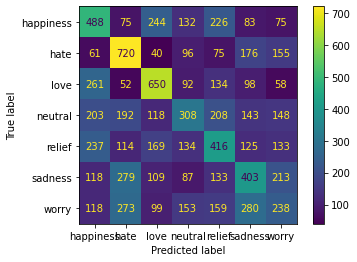

0.3465218793678099
(0.33747027335969076, 0.3462193079128793, 0.33929647399732105, None)


In [19]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr', C=17.0)
# acc10k=cross_val_score(clf, X, y, cv=10)
# np.mean(acc10k)
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

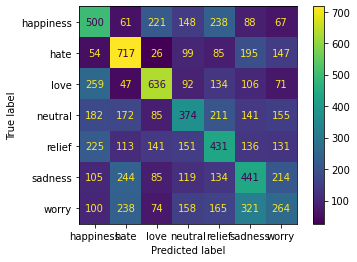

0.3615740242984625
(0.3570576234456086, 0.3613195787591571, 0.35772602562112976, None)


In [20]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)